In [11]:
import pandas as pd
import os
import numpy as np

In [2]:
df

NameError: name 'df' is not defined

In [58]:
file

'~$CN1308591_table-24104.xlsx'

In [3]:
column_dict = dict()

files = os.listdir('../data/excel/')

removals = ['~$CN1308591_table-24104.xlsx','.DS_Store']
for f in removals:
    files.remove(f)

mapper = dict()

for file in files:
    df = pd.read_excel(f'../data/excel/{file}')
    lang = file[:2]
    columns = df.columns.tolist()
    idx = df[df[columns[0]] == 'Glass No'].index[-1]
    
    idx0 = df[df[columns[0]] == 'Glass No'].index[0]
    idx1 = df[df[columns[0]] == 'Glass No'].index[-1]

    for k,v in zip(df.iloc[idx0], df.iloc[idx1]):
        k = k.replace("\n", ' ')
        if k in mapper:
            mapper[k].append([v,lang])
        else:
            mapper[k] = [[v,lang]]
    dff = df.iloc[idx:,:]
    dff.columns = df.iloc[idx]
    dff = dff.iloc[1:,:]
    column_dict[file] = dff.columns.tolist()

In [4]:
len(mapper.keys())

119

In [62]:
# α*1E7, K-1： Thermal expansion coefficient temp.range, °C： Temperature range
# H: Microhardness

In [5]:
α*1E7, K-1： Thermal expansion coefficient temp

SyntaxError: invalid decimal literal (2724405180.py, line 1)

In [6]:
dfcolum_stats = pd.DataFrame()
dfcolum_stats['col_names'] = mapper.keys()
dfcolum_stats['variations'] = mapper.values()
dfcolum_stats['num_variations'] = dfcolum_stats['variations'].apply(lambda x: len(x))
dfcolum_stats = dfcolum_stats.sort_values(by='num_variations', ascending=False)


In [64]:
# dfcolum_stats[30:50]

,col_names,variations,num_variations
57,CeO2,"[[CeO2, JP], [CeO2, US], [CeO2, RU], [CeO2, CN...",7
5,V2O5,"[[V2O5, RU], [V2O5, CN], [V2O5, JP], [V2O5, KR...",7
71,Softening point,"[[Tsoft, °C, JP], [Tsoft, °C, CN], [Tsoft, °C,...",6
89,"log(ρ, Ohm.cm)： Electrical resistivity T, °C： ...","[[log(ρ, Ohm.cm) at T, °C at 250, CN], [log(ρ,...",6
43,Sb2O3,"[[Sb2O3, RU], [Sb2O3, RU], [Sb2O3, RU], [Sb2O3...",6
41,Temperature,"[[T, °C, RU], [T, °C, JP], [Melting T, °C, JP]...",5
23,Nb2O5,"[[Nb2O5, JP], [Nb2O5, US], [Nb2O5, CN], [Nb2O5...",5
34,Annealing Point,"[[A.P., °C, FR], [A.P., °C, JP], [A.P., °C, FR...",5
29,Liquidus temperature,"[[Tliq, °C, JP], [Tliq, °C, JP], [Tliq, °C, JP...",5
27,Ta2O5,"[[Ta2O5, JP], [Ta2O5, JP], [Ta2O5, US], [Ta2O5...",5


In [78]:
# prompt = f"Identify the language of the document and then identify if {x} present in the given document ? The output format should be JSON {'lang': 'str', 'presence':True/False}"


In [7]:
prompt_mapper = {"α*1E7, K-1： Thermal expansion coefficient temp.range, °C： Temperature range":"thermal expansion coefficient at different temperatures",
                "Glass transition temperature": "Glass transition temperature",
                "Density" : "Density",
                "T, °C： Temperature log(η, P)： η: Viscosity" : "Viscosity at given temperature or temperature at given visocity",
                 "E: Young's modulus": "Young's modulus",
                 "Thermal expansion coefficient":"Thermal expansion coefficient",
                 "Refractive index" : "Refractive index",
                 "H: Microhardness" : "Hardness",
                 "Crystallization temperature": "Crystallization temperature",
                 "τ, %： Transmittance λ, nm： Wavelength" : "transmittance at different wavelengths",
                 "Liquidus temperature": "Liquidus temperature"         
        }

In [8]:
for k, v in prompt_mapper.items():
    prompt = "Identify the language of the document and then identify if {variable} present in the given document ? The output format should be JSON {{'lang': 'str', 'presence':True/False}}".format(variable=v)
    print(prompt)

Identify the language of the document and then identify if thermal expansion coefficient at different temperatures present in the given document ? The output format should be JSON {'lang': 'str', 'presence':True/False}
Identify the language of the document and then identify if Glass transition temperature present in the given document ? The output format should be JSON {'lang': 'str', 'presence':True/False}
Identify the language of the document and then identify if Density present in the given document ? The output format should be JSON {'lang': 'str', 'presence':True/False}
Identify the language of the document and then identify if Viscosity at given temperature or temperature at given visocity present in the given document ? The output format should be JSON {'lang': 'str', 'presence':True/False}
Identify the language of the document and then identify if Young's modulus present in the given document ? The output format should be JSON {'lang': 'str', 'presence':True/False}
Identify the

In [9]:
dfcolum_stats.col_names.loc[29]

'Liquidus temperature'

<h2>column names with language</h2>

In [85]:
# {pdf_name}_{prop_lang_identification}.json

In [86]:

# dfcolum_stats.col_names.loc[8] , dfcolum_stats.variations.loc[8]

In [12]:
idx_list = [8, 37, 14, 53, 40, 32, 16, 9, 50, 103, 29]
lang_viz = dict()
for idx in idx_list:
    # print(dfcolum_stats.col_names.loc[idx], set(dfcolum_stats.variations.loc[idx]))
    # print(dfcolum_stats.col_names.loc[idx], dfcolum_stats.variations.loc[idx])
    key = dfcolum_stats.col_names.loc[idx]
    values = dfcolum_stats.variations.loc[idx]
    langs = [val[-1] for val in values]
    lang_viz[key] = langs
    print(key, np.unique(lang_viz[key], return_counts=True))
    
    print('---')

α*1E7, K-1： Thermal expansion coefficient temp.range, °C： Temperature range (array(['CN', 'FR', 'JP', 'KR', 'RU', 'US'], dtype='<U2'), array([7, 8, 3, 3, 3, 6]))
---
Glass transition temperature (array(['CN', 'FR', 'JP', 'KR', 'US'], dtype='<U2'), array([7, 2, 5, 1, 4]))
---
Density (array(['FR', 'JP', 'KR', 'RU', 'US'], dtype='<U2'), array([4, 4, 1, 4, 3]))
---
T, °C： Temperature log(η, P)： η: Viscosity (array(['CN', 'FR', 'JP', 'RU', 'US'], dtype='<U2'), array([1, 1, 9, 3, 1]))
---
E: Young's modulus (array(['FR', 'JP', 'RU', 'US'], dtype='<U2'), array([2, 5, 1, 4]))
---
Thermal expansion coefficient (array(['CN', 'FR', 'JP', 'RU', 'US'], dtype='<U2'), array([1, 4, 2, 2, 2]))
---
Refractive index (array(['CN', 'FR', 'JP', 'KR', 'RU', 'US'], dtype='<U2'), array([1, 2, 3, 1, 1, 2]))
---
H: Microhardness (array(['FR', 'JP', 'RU', 'US'], dtype='<U2'), array([2, 3, 3, 1]))
---
Crystallization temperature (array(['CN', 'US'], dtype='<U2'), array([5, 3]))
---
τ, %： Transmittance λ, nm： Wave

In [14]:
for k, v in mapper.items():
    print(k, 10*'|', len(v), 10*'|', set(v))

TypeError: unhashable type: 'list'

In [15]:
flat = []
for k,v in column_dict.items():
    flat.extend(v)

In [26]:
# Is density present in this document? output format {'is_present':True/False,
#                                                    'unit': ''}

In [16]:
# Visualising the column names (composition and property) present in the dataset
pd.Series(flat).value_counts()[:20]

Glass No      54
SiO2          48
Al2O3         47
CaO           38
B2O3          37
MgO           31
Na2O          30
BaO           30
K2O           30
ZnO           28
ZrO2          20
Li2O          19
TiO2          19
d, g/cm3      16
Tg, °C        15
SrO           15
Fe2O3         14
P2O5          12
α*1E7, K-1    11
E, GPa        10
dtype: int64

In [ ]:
properties = {
    "α*1E7, K-1： Thermal expansion coefficient\ntemp.range, °C： Temperature range": 'coefficient of thermal expansion",
    "Glass transition temperature"}

SyntaxError: unterminated string literal (detected at line 2) (883719189.py, line 2)

In [18]:
pd.Series(flat).value_counts()

Glass No                               54
SiO2                                   48
Al2O3                                  47
CaO                                    38
B2O3                                   37
                                       ..
λ, nm                                   1
λ, W/m.K T, K at 298                    1
Cp, J/mol.K T, K at 298                 1
H2O, ppm                                1
α*1E7, K-1 temp.range, °C in 20-600     1
Length: 163, dtype: int64

/var/folders/48/bs28kjsn4jq93mv_tscqmzvm0000gn/T/ipykernel_4303/2682785491.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("Set2", df_plot.shape[1]).colors
/var/folders/48/bs28kjsn4jq93mv_tscqmzvm0000gn/T/ipykernel_4303/2682785491.py:59: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  plt.tight_layout()
/Users/defnecirci/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


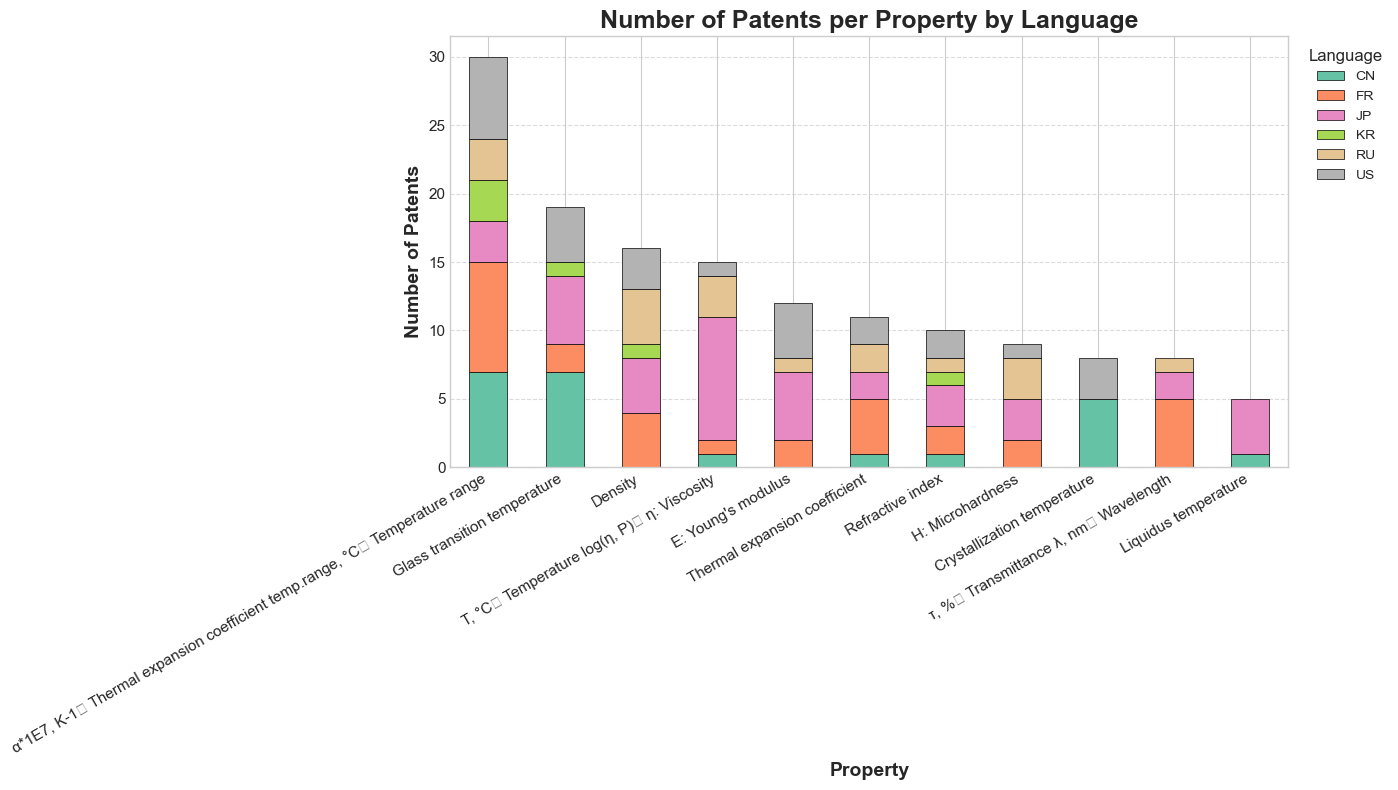

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm

# --- Your preprocessing (same as before) ---
idx_list = [8, 37, 14, 53, 40, 32, 16, 9, 50, 103, 29]
lang_viz = dict()
for idx in idx_list:
    key = dfcolum_stats.col_names.loc[idx]
    values = dfcolum_stats.variations.loc[idx]
    langs = [val[-1] for val in values]
    lang_viz[key] = langs

plot_data = {}
for key, langs in lang_viz.items():
    unique_langs, counts = np.unique(langs, return_counts=True)
    plot_data[key] = dict(zip(unique_langs, counts))

df_plot = pd.DataFrame(plot_data).T.fillna(0).astype(int)

# --- Pretty Plotting ---
plt.style.use("seaborn-v0_8-whitegrid")  # modern clean style

# Pick a color palette (tab20 is good for many categories)
colors = cm.get_cmap("Set2", df_plot.shape[1]).colors  

ax = df_plot.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 8),
    color=colors,
    edgecolor="black",
    linewidth=0.5,
)

# Titles and labels
plt.title("Number of Patents per Property by Language", fontsize=18, weight="bold")
plt.xlabel("Property", fontsize=14, weight="bold")
plt.ylabel("Number of Patents", fontsize=14, weight="bold")

# Rotate x-axis labels for readability
plt.xticks(rotation=30, ha="right", fontsize=11)
plt.yticks(fontsize=11)

# Legend styling
plt.legend(
    title="Language",
    title_fontsize=12,
    fontsize=10,
    loc="upper left",
    bbox_to_anchor=(1.01, 1),
    frameon=False,
)

# Add gridlines
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


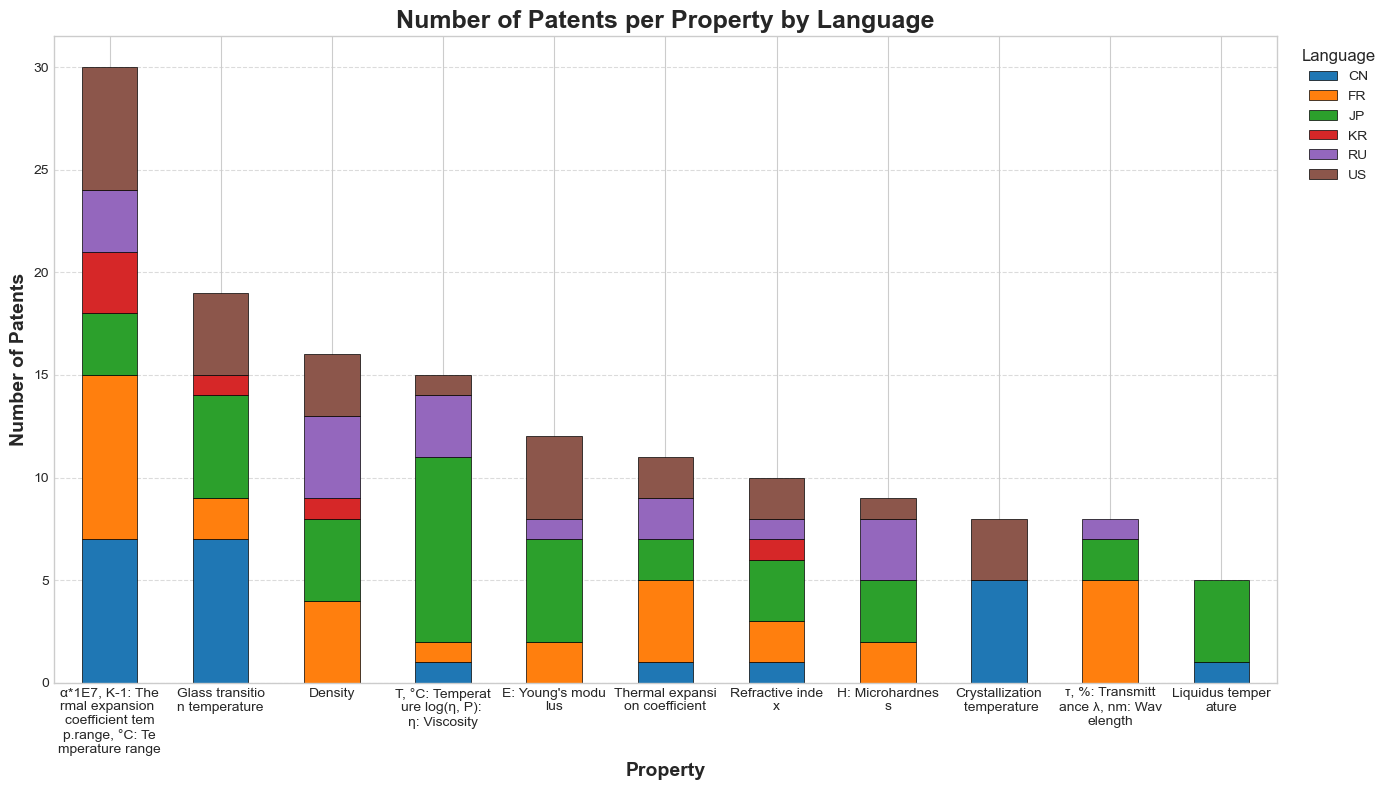

In [ ]:
import unicodedata

# --- Normalize + wrap labels ---
def normalize_labels(labels):
    return [unicodedata.normalize("NFKC", str(label)) for label in labels]

def wrap_labels(labels, width=15):
    return ['\n'.join([label[i:i+width] for i in range(0, len(label), width)]) for label in labels]

# Apply normalization first
df_plot.index = normalize_labels(df_plot.index)

# --- Pretty Plotting ---
plt.style.use("seaborn-v0_8-whitegrid")

colors = cm.get_cmap("Set2", df_plot.shape[1]).colors  

ax = df_plot.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 8),
    color=colors,
    edgecolor="black",
    linewidth=0.5,
)

# Replace x-tick labels with wrapped ones
ax.set_xticklabels(wrap_labels(df_plot.index, width=15), rotation=0, ha="center")

# Titles and labels
plt.title("Number of Patents per Property by Language", fontsize=18, weight="bold")
plt.xlabel("Property", fontsize=14, weight="bold")
plt.ylabel("Number of Patents", fontsize=14, weight="bold")

# Legend styling
plt.legend(
    title="Language",
    title_fontsize=12,
    fontsize=10,
    loc="upper left",
    bbox_to_anchor=(1.01, 1),
    frameon=False,
)

ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()
